<a href="https://colab.research.google.com/github/amitverma2325/Customer_Segmentation/blob/main/Customer_Segmentation_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Name**    -  Customer Segmentation Analysis

##### **Project Type**    - Classification
##### By                - Amit Verma

# **Project Summary -**

Customer segmentation is a way to split customers into groups based on certain characteristics that those customers share. All customers share the common need of your product or service, but beyond that, there are distinct demographic differences (i.e., age, gender) and they tend to have additional socio-economic, lifestyle, or other behavioral differences that can be useful to the organization.

In this project i have calculated RFM scores and then applied KMeans clustering
and found the no of optimized clusters.

This project involve following steps.

Firstally i have dealt with cleaning and preprocessing of the data removing inconcistencies from the data like checking null values duplicates and handling null values and dropping irrelevant data.

Secondally I do Visualization of variables through different chart.

In the third part I calculated RFM scores and applied KMeans Clustering
The project conclude that KMeans clustering on Recency, Frequency and Monetary data gives us the best result with the optimal number of clusters as 3. We can use this model to cluster our data in 3 segments and develop better marketing strategies.



# **Problem Statement**


In this case study, my task is to identify major customer segments on a transactional data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

# ***Let's Begin !***

## ***1. Know Your Data***

#Data Description:
Attribute Information:
InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

Description: Product (item) name. Nominal.

Quantity: The quantities of each product (item) per transaction. Numeric.

InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.

UnitPrice: Unit price. Numeric, Product price per unit in sterling.

CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

Country: Country name. Nominal, the name of the country where each customer resides.

### Import Libraries

In [1]:
# Importing the libraries

import numpy as np
import pandas as pd
from numpy import math

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = [18,7]
sns.set(rc={'figure.figsize':(18,7)})

<ipython-input-1-a82e7b26ccc0>:5: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


### Dataset Loading

In [2]:
# Load Dataset
df = pd.read_csv('/content/Online Retail .csv')


### Dataset First View

In [3]:
# Dataset First Look
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
rows_columns_df = df.shape
print("No of rows and columns in dataset:",rows_columns_df)

No of rows and columns in dataset: (541909, 8)


### Dataset Information

In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
df.duplicated().sum()

5268

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

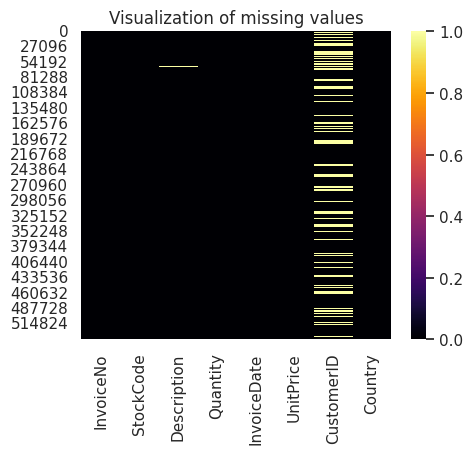

In [8]:
# Visualizing the missing values

# plotting the chart
plt.figure(figsize=(5,4))
sns.heatmap(df.isnull(),cmap='inferno')

# Setting title
plt.title('Visualization of missing values')

# Show chart
plt.show()


In [10]:
# dropping  duplicated rows and null values
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

In [11]:
# check for duplicates again
df.duplicated().sum()


0

In [12]:
#check for null values again
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### What did you know about your dataset?

There are 541909 rows and 8 columns in our dataset.There are 5268 duplicate values as well as 1454 missing/null values in Description column and 135080 in Customer_ID column.

## ***2. Understanding Your Variables***

In [13]:
# Dataset Columns
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [14]:
# Dataset Describe
df.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


In [15]:
df.shape

(401604, 8)

In [16]:
# Check Unique Values for each variable.
pd.Series({col:df[col].unique() for col in df})

InvoiceNo      [536365, 536366, 536367, 536368, 536369, 53637...
StockCode      [85123A, 71053, 84406B, 84029G, 84029E, 22752,...
Description    [WHITE HANGING HEART T-LIGHT HOLDER, WHITE MET...
Quantity       [6, 8, 2, 32, 3, 4, 24, 12, 48, 18, 20, 36, 80...
InvoiceDate    [12/1/2010 8:26, 12/1/2010 8:28, 12/1/2010 8:3...
UnitPrice      [2.55, 3.39, 2.75, 7.65, 4.25, 1.85, 1.69, 2.1...
CustomerID     [17850.0, 13047.0, 12583.0, 13748.0, 15100.0, ...
Country        [United Kingdom, France, Australia, Netherland...
dtype: object

## 3. ***Data Wrangling***

In [17]:
# check for order cancellations
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
df[df['InvoiceNo'].str.startswith('C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


There are 8872 records where the orders are cancelled and the quantity contains a negative value.

We will drop these cancelled order records from our analysis.

In [18]:
# consider only the non cancelled orders
df = df[~df['InvoiceNo'].str.startswith('C')]

# check the shape of the data after removing cancelled orders
df.shape

(392732, 8)

In [19]:
# description of the dataset
df.describe()

,Quantity,UnitPrice,CustomerID
count,392732.000000,392732.000000,392732.000000
mean,13.153718,3.125596,15287.734822
std,181.588420,22.240725,1713.567773
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


There are no negative values in the Quantity and UnitPrice column now.

But we can still see a minimum value of 0 in the UnitPrice column which cannot be real as a store cannot sell items for free.

We will investigate this column and remove those records.

In [20]:
# check for the columns having zero unit price
df[df['UnitPrice']==0]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,12/5/2010 14:02,0.0,12647.0,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,12/16/2010 14:36,0.0,16560.0,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,12/21/2010 13:45,0.0,14911.0,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,1/6/2011 16:41,0.0,13081.0,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,1/6/2011 16:41,0.0,13081.0,United Kingdom
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,1/13/2011 15:10,0.0,15107.0,United Kingdom
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2/10/2011 13:08,0.0,17560.0,United Kingdom
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,3/23/2011 10:25,0.0,13239.0,United Kingdom
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,3/30/2011 12:45,0.0,13113.0,United Kingdom
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,4/4/2011 14:42,0.0,14410.0,United Kingdom


There are few records with zero values in UnitPrice which cannot be true so we will drop these records.


In [21]:
# only consider UnitPrice greater than zero
df = df[df['UnitPrice'] > 0]

# check description of UnitPrice after dropping
df['UnitPrice'].describe()

count    392692.000000
mean          3.125914
std          22.241836
min           0.001000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64

In [22]:
# first five rows of the data
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [23]:
# shape of the dataset
df.shape

(392692, 8)

Our dataset is almost a cleaned one now and we can move to EDA but before that we can create some additional features for our dataset.

#  *4. Feature Engineering*


Feature engineering is a machine learning technique that leverages data to create new variables that aren’t in the training set. It can produce new features for both supervised and unsupervised learning, with the goal of simplifying and speeding up data transformations while also enhancing model accuracy.

In [24]:
# convert invoicedate column into datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format = "%m/%d/%Y %H:%M")

In [25]:
# create some new features from invoice date
df['day'] = df['InvoiceDate'].dt.day_name()
df['year'] = df['InvoiceDate'].apply(lambda x: x.year)
df['month_num'] = df['InvoiceDate'].apply(lambda x: x.month)
df['day_num'] = df['InvoiceDate'].apply(lambda x: x.day)
df['hour'] = df['InvoiceDate'].apply(lambda x: x.hour)
df['minute'] = df['InvoiceDate'].apply(lambda x: x.minute)
df['month'] = df['InvoiceDate'].dt.month_name()

In [26]:
# create TotalAmount from Quantity and UnitPrice
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

In [27]:
# top 5 rows of the data
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,day,year,month_num,day_num,hour,minute,month,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,20.34


## ***5. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1
Which products are the most sold ones?

In [28]:
# count of each product description
desc_df = df['Description'].value_counts().reset_index()
desc_df.head()

,Description,count
0,WHITE HANGING HEART T-LIGHT HOLDER,2016
1,REGENCY CAKESTAND 3 TIER,1713
2,JUMBO BAG RED RETROSPOT,1615
3,ASSORTED COLOUR BIRD ORNAMENT,1395
4,PARTY BUNTING,1389


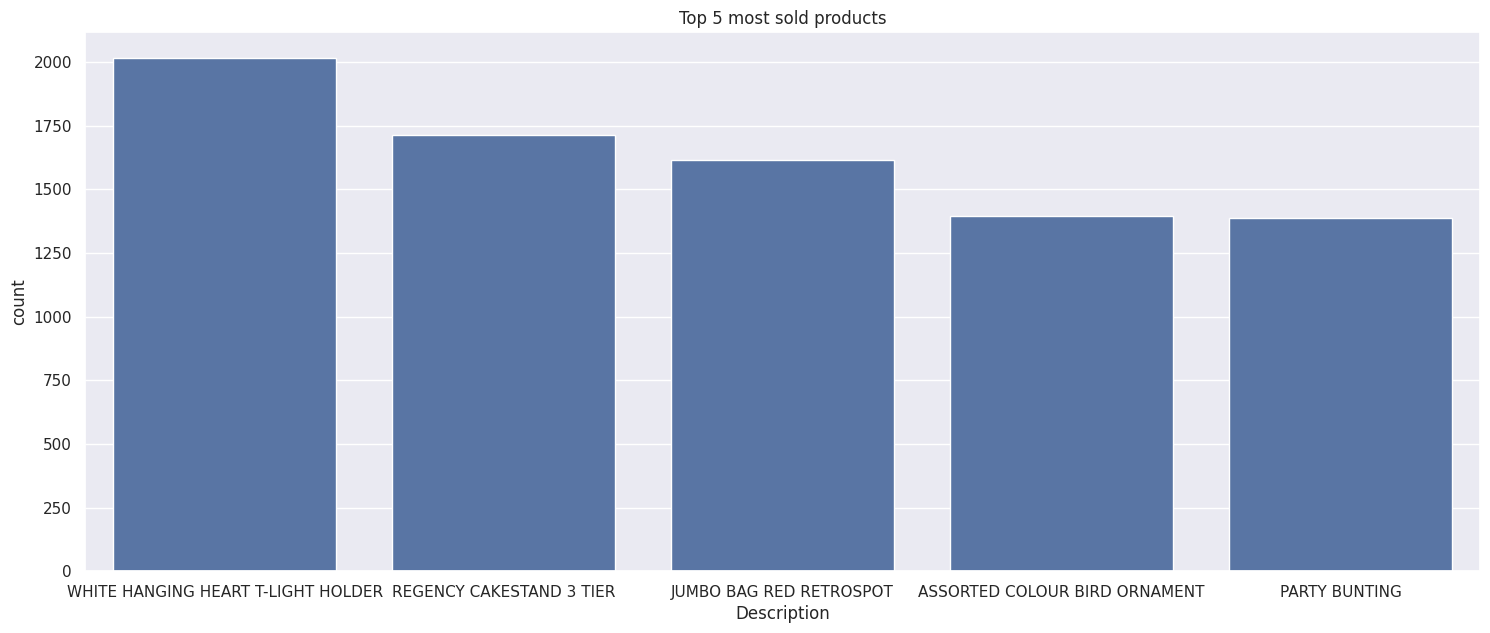

In [29]:
# Chart - 1 visualization code

# Plotting the chart
sns.barplot(x='Description',y='count',data=desc_df[:5])

# Setting title
plt.title("Top 5 most sold products")

# Show chart
plt.show()


The top 5 most sold products are:

1. White Hanging Heart T-Light Holder

2. Regency Cakestand 3 Tier

3. Jumbo Bag Red Retrospot

4. Assorted Colour Bird Ornament

5. Party Bunting

#### Chart - 2

Which products are the least sold ones?

In [30]:
# bottom 5 products
desc_df.tail()

,Description,count
3872,GREEN WITH METAL BAG CHARM,1
3873,WHITE WITH METAL BAG CHARM,1
3874,BLUE/NAT SHELL NECKLACE W PENDANT,1
3875,PINK EASTER HENS+FLOWER,1
3876,"PAPER CRAFT , LITTLE BIRDIE",1


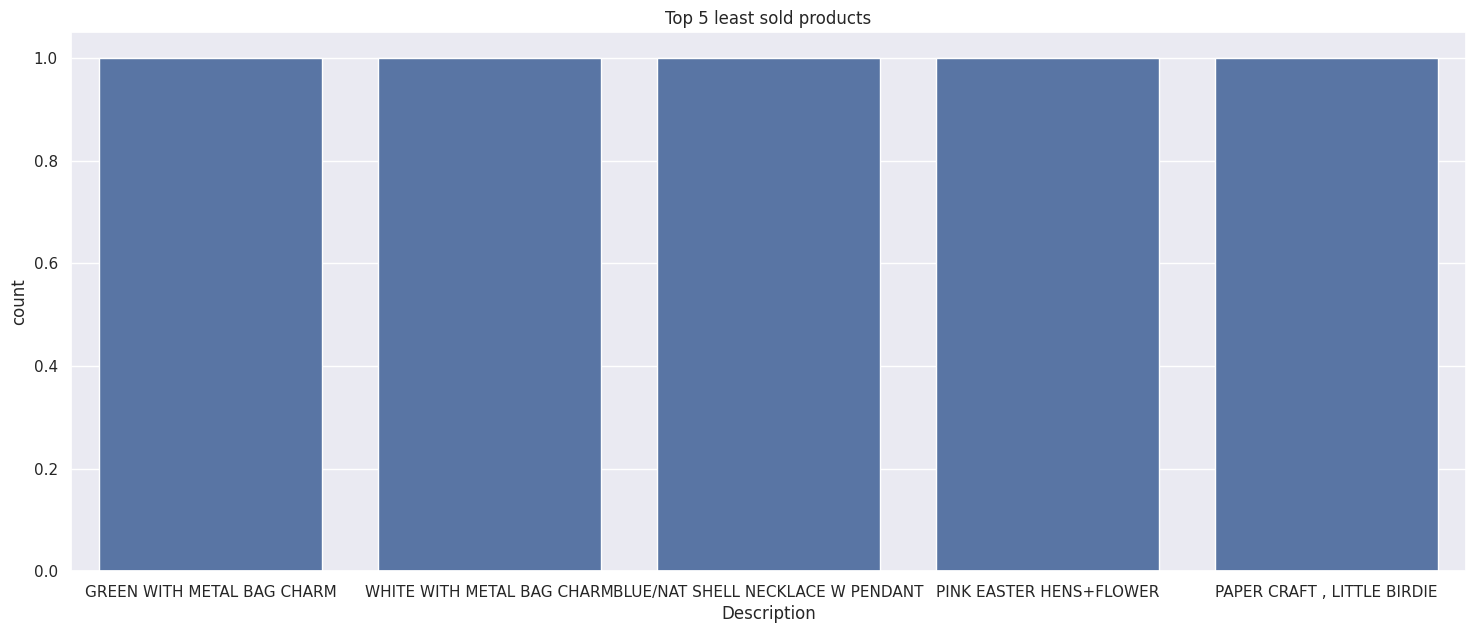

In [31]:
# Chart - 2 visualization code

# Plotting the chart
sns.barplot(x='Description',y='count',data=desc_df[-5:])

# Setting title
plt.title("Top 5 least sold products")

# Show chart
plt.show()


The top 5 least sold products are:

1. Green with Metal Bag Charm

2. White with Metal Bag Charm

3. Blue/Nat Shell Necklace W Pendant

4. Pink Easter Hens + Flower

5. Paper Craft, Little Birdie

#### Chart - 3
Which countries has the most number of customers?

In [32]:
# count of customers for each country
country_df = df['Country'].value_counts().reset_index()
country_df.head()

,Country,count
0,United Kingdom,349203
1,Germany,9025
2,France,8326
3,EIRE,7226
4,Spain,2479


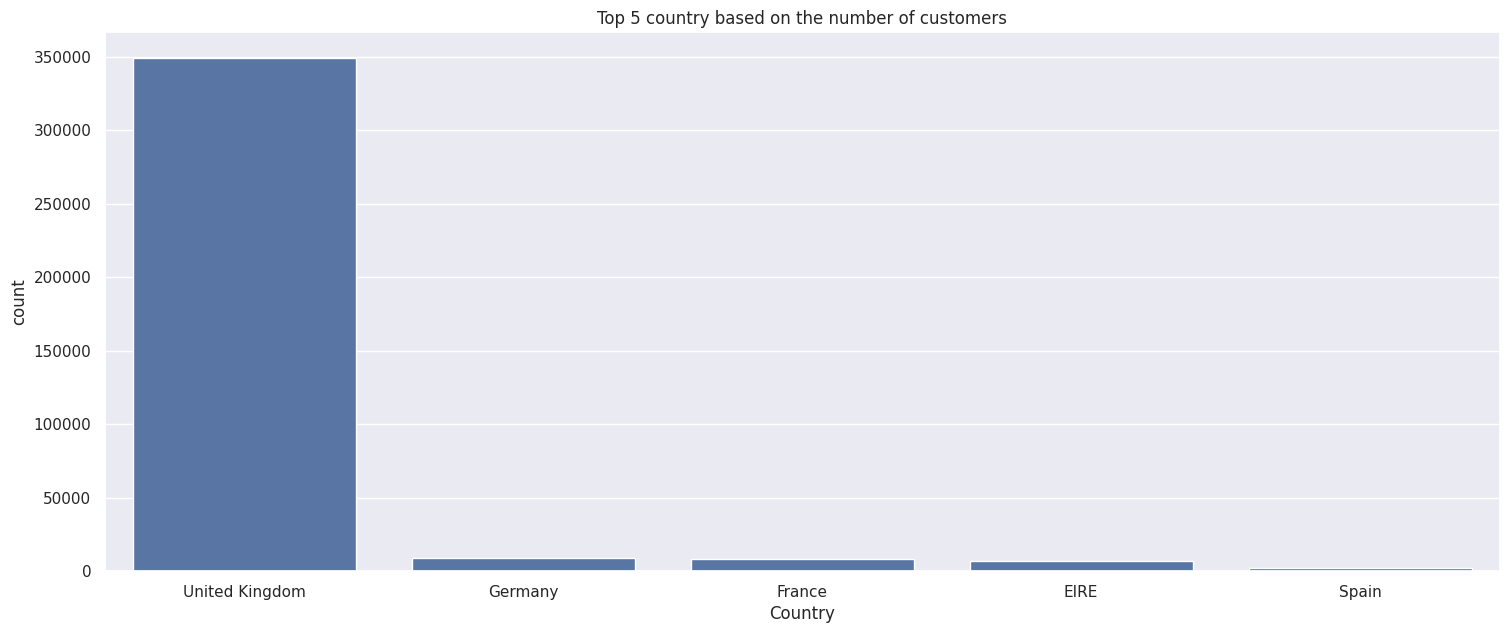

In [33]:
# Chart - 3 visualization code

# Plotting the chart
sns.barplot(x='Country',y='count',data=country_df[:5])

# Setting title
plt.title("Top 5 country based on the number of customers")

# Show chart
plt.show()


As it is an UK based company, a huge chunk of the customers are from United Kingdom only.

There are very few customers as compared to UK for other countries.

#### Chart - 4

Which countries has the least number of customers?

In [34]:
# bottom 5 countries based on the number of customers
country_df.tail()

,Country,count
32,Lithuania,35
33,Brazil,32
34,Czech Republic,25
35,Bahrain,17
36,Saudi Arabia,9


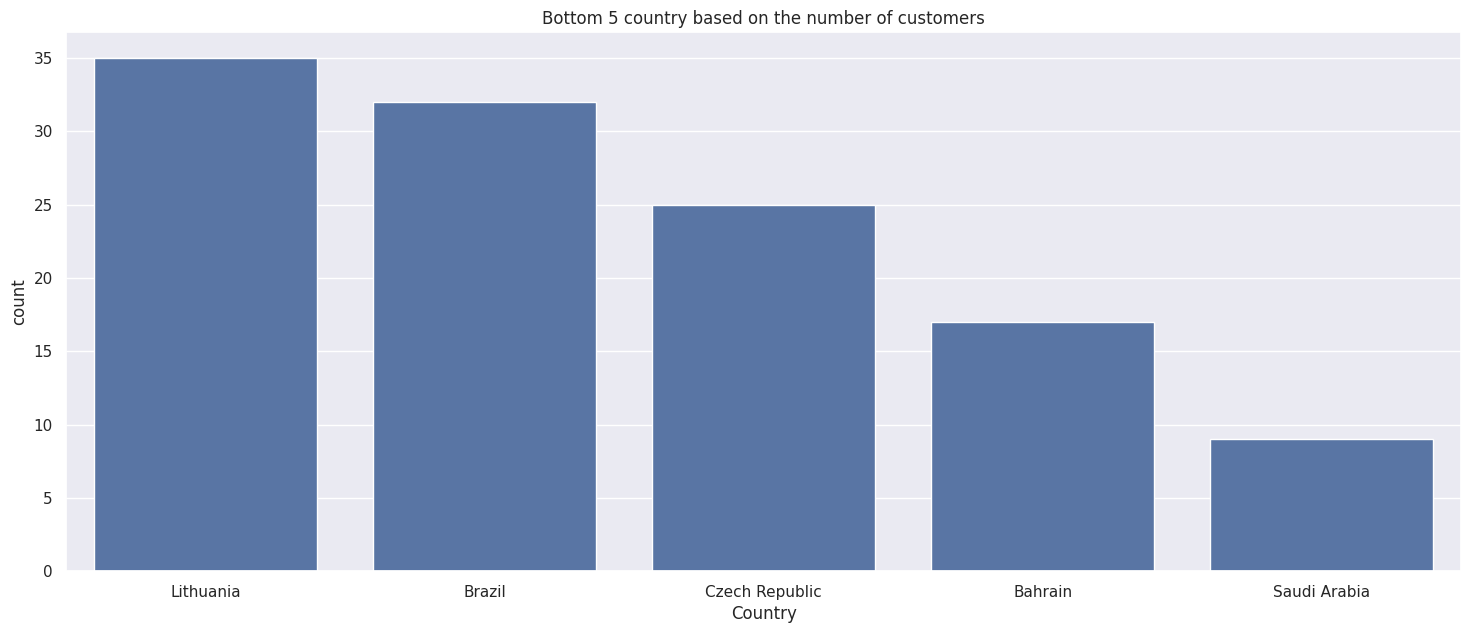

In [35]:
# Chart - 4 visualization code

# Plotting the chart
sns.barplot(x='Country',y='count',data=country_df[-5:])

# Setting title
plt.title("Bottom 5 country based on the number of customers")

# Show chart
plt.show()



Saudi Arabia has the least number of customers followed by Bahrain.

In [36]:
# number of unique customers
len(df['CustomerID'].unique())

4338

#### Chart - 5
What is the order share of the top 10 customers?

In [37]:
# order share of top 10 customers
share_df = (df['CustomerID'].value_counts()/sum(df['CustomerID'].value_counts()) * 100).reset_index()
share_df.columns = ['Customer ID', 'Order Share']
share_df.head(10).cumsum()

,Customer ID,Order Share
0,17841.0,1.954713
1,32752.0,3.398592
2,46848.0,4.700121
3,59596.0,5.823648
4,74202.0,6.505353
5,89513.0,7.107861
6,104159.0,7.636519
7,117248.0,8.098459
8,130511.0,8.522965
9,144809.0,8.939831


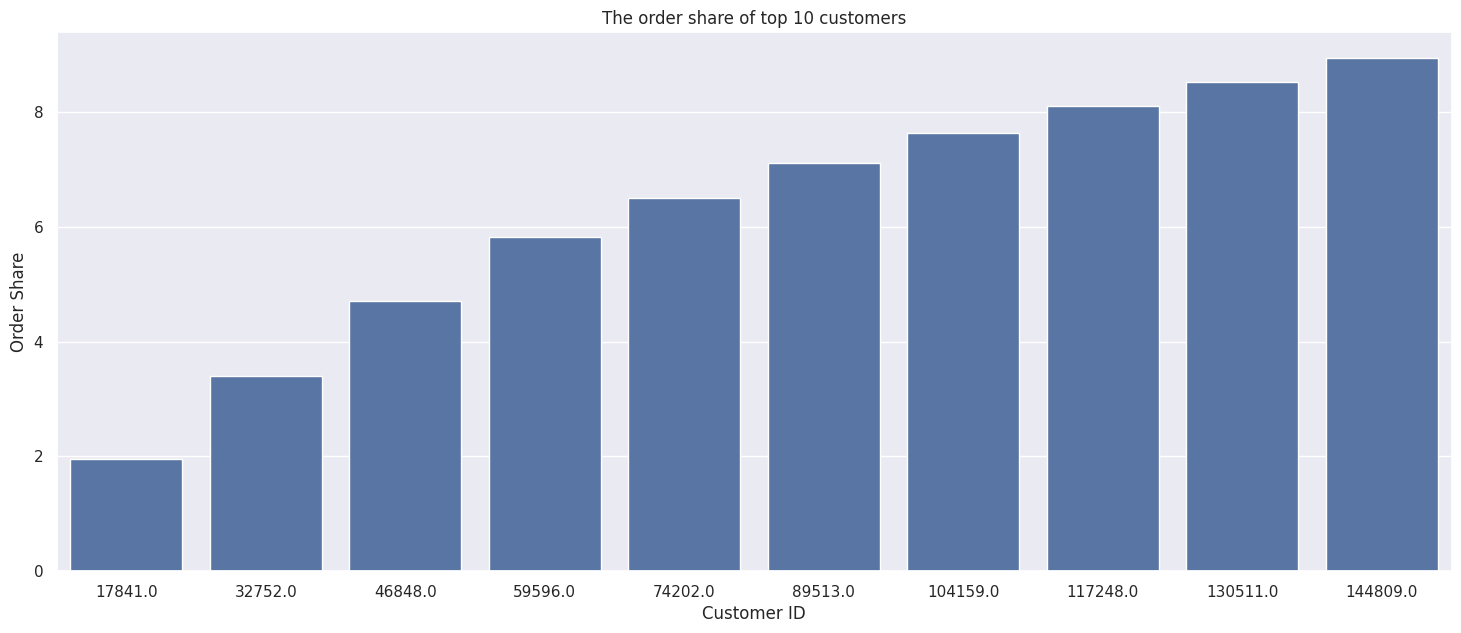

In [38]:
# Chart - 5 visualization code

# Plotting the chart
sns.barplot(x='Customer ID', y='Order Share', data=share_df[:10].cumsum())

# Setting title
plt.title("The order share of top 10 customers")

# Show chart
plt.show()



We can observe that only 10 customers out of 4338 unique customers are responsible for approx 9% of the total orders.

We can infer that these customers might be wholesalers.

Let us check the distribution of the numerical columns.


#### Chart - 6

Let us check the distribution of the numerical columns.


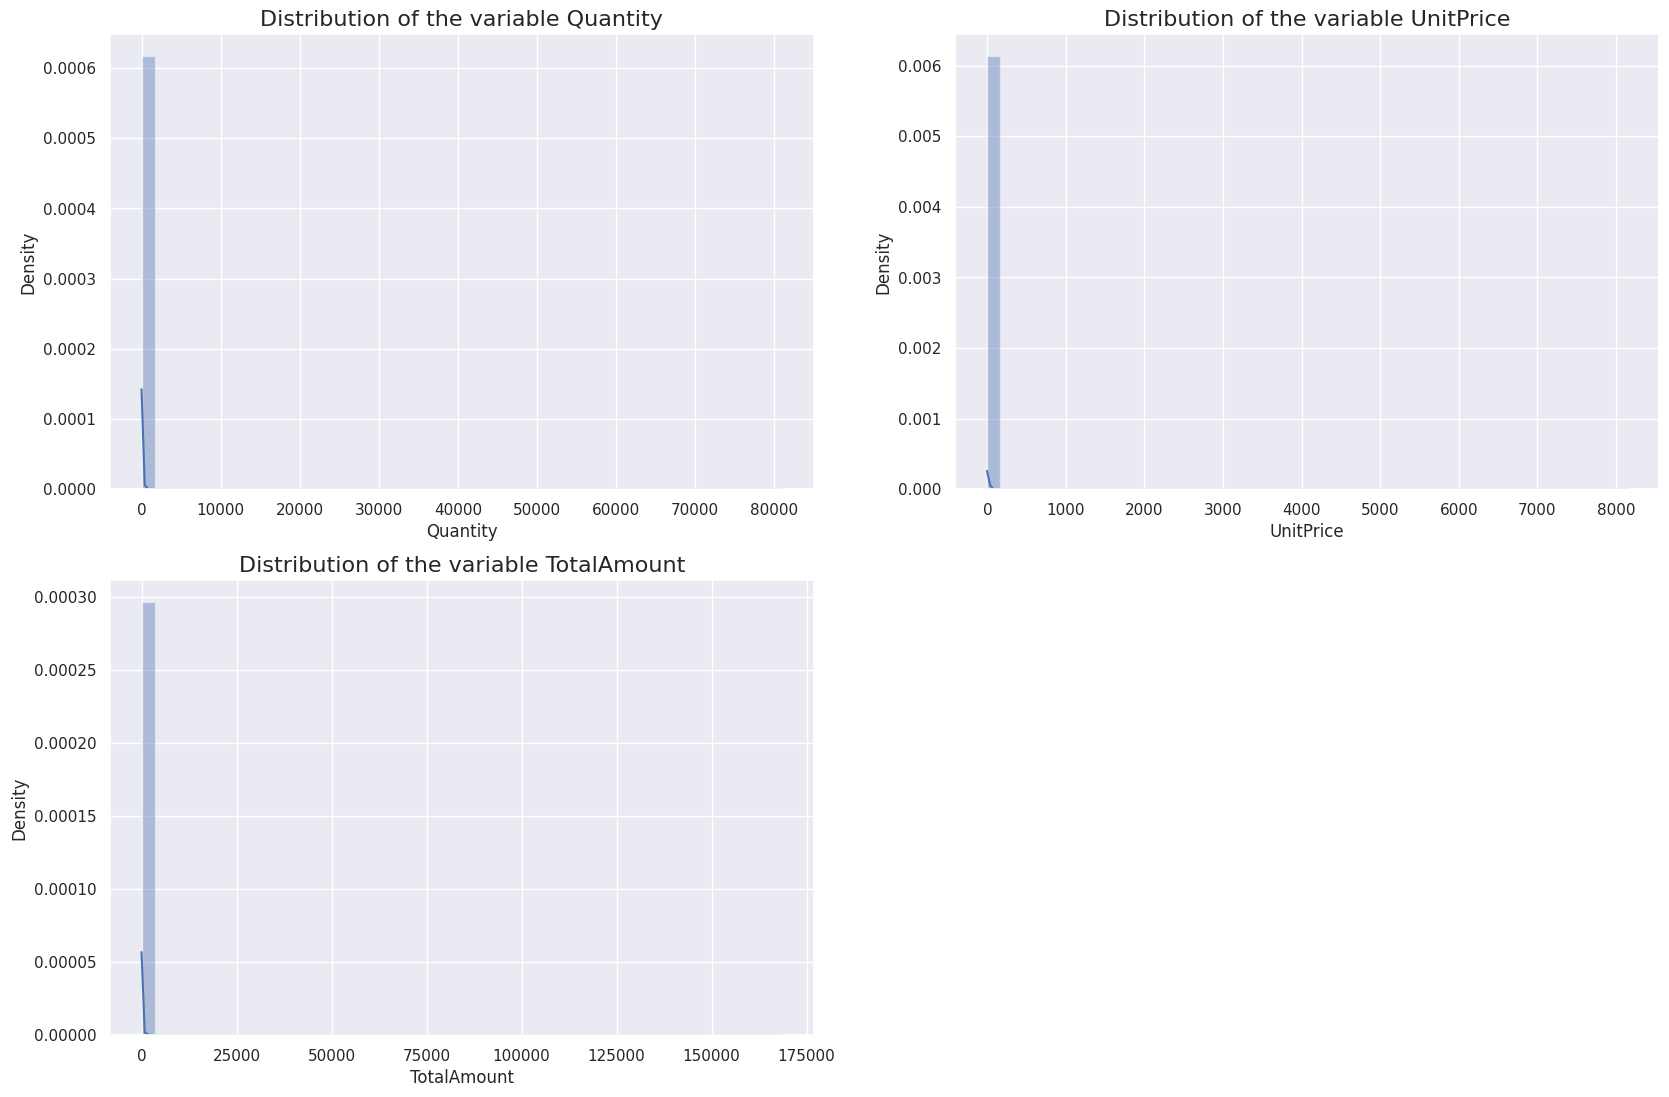

In [39]:
# Chart - 6 visualization code

# plot the distribution of the numerical features
num_features = ['Quantity', 'UnitPrice', 'TotalAmount']
count = 1
plt.subplots(figsize=(20,13))
for feature in num_features:
  plt.subplot(2,2,count)
  sns.distplot(df[feature])
  plt.title(f"Distribution of the variable {feature}", fontsize=16)
  plt.xlabel(f"{feature}")
  plt.ylabel("Density")
  count += 1



The distribution of all the variables are heavily right skewed.

We will apply log transformation on these variables to make it less skewed.

#### Chart - 7

Log Transformation on distribution of numerical columns

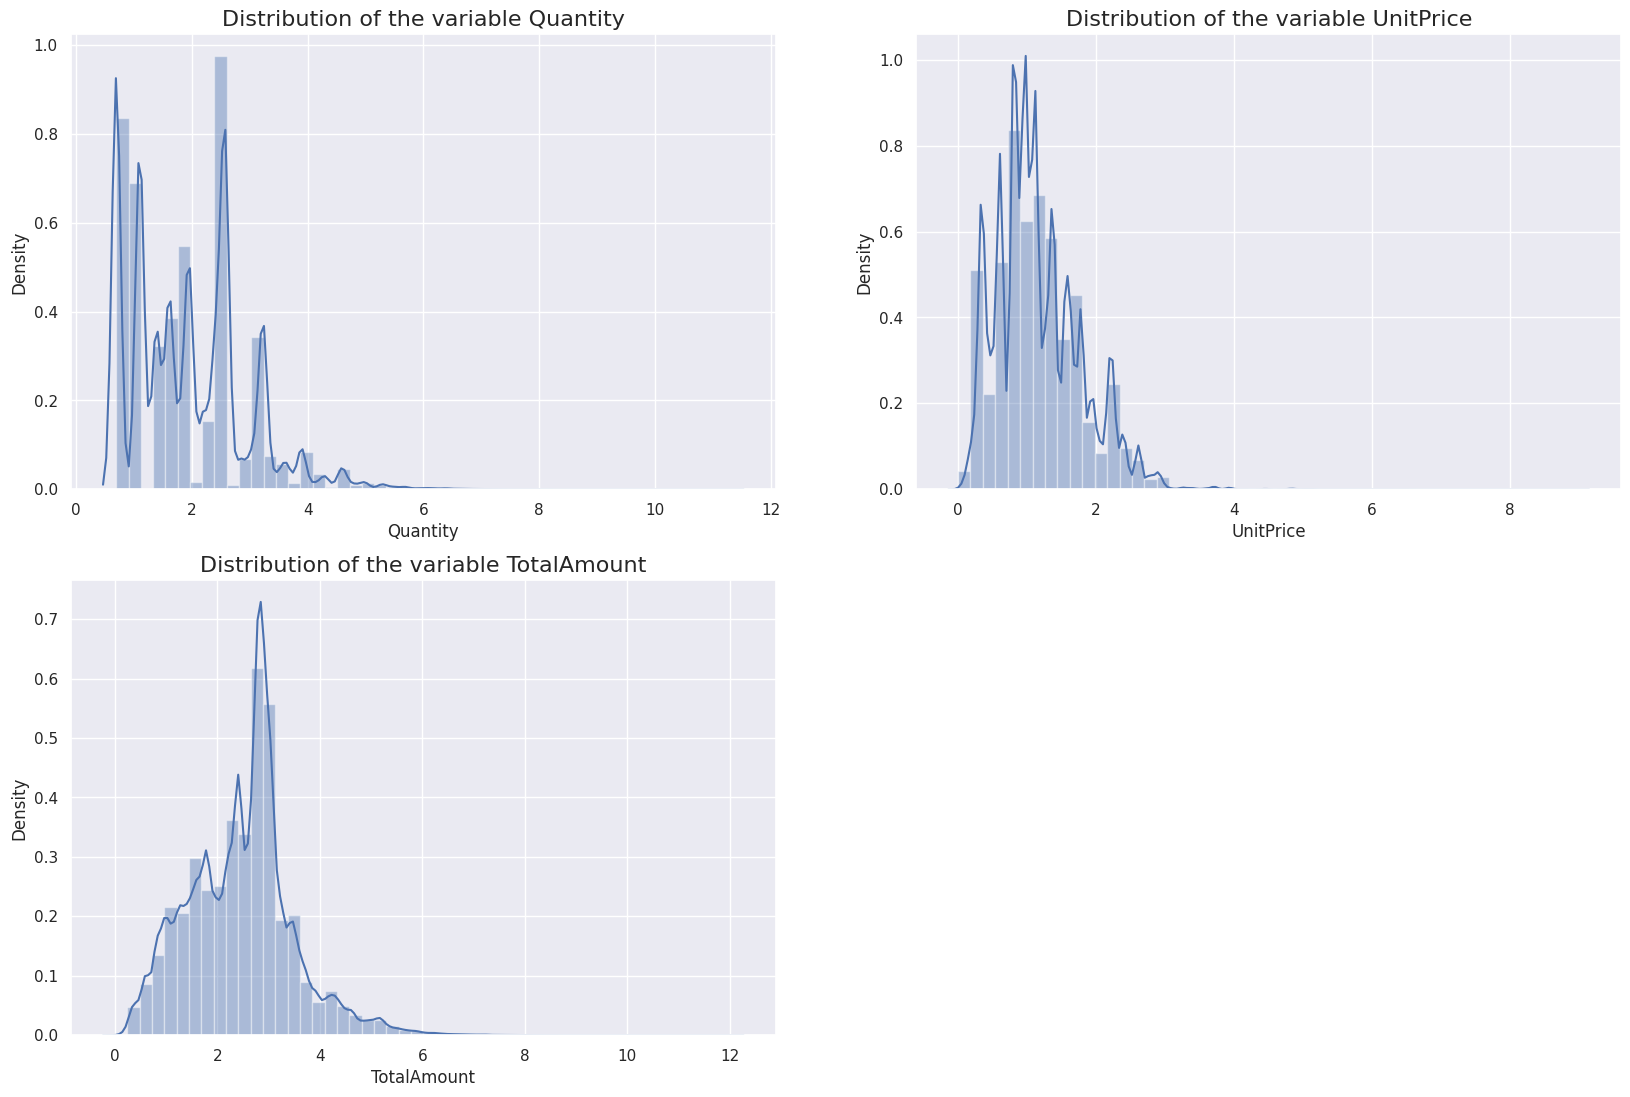

In [40]:
# Chart - 7 visualization code

# taking a log transformation
count = 1
plt.subplots(figsize=(20,13))
for feature in num_features:
  plt.subplot(2,2,count)
  sns.distplot(np.log1p(df[feature]))
  plt.title(f"Distribution of the variable {feature}", fontsize=16)
  plt.xlabel(f"{feature}")
  plt.ylabel("Density")
  count += 1


The variables after log transformation are less skewed than before.

It isn't a normal distribution but somewhat close to that than before.

#### Chart - 8

Which day of the week had the most and the least number of purchases?

In [41]:
# number of purchases w.r.t the day of the week
day_df = df['day'].value_counts().reset_index()
day_df

,day,count
0,Thursday,79243
1,Wednesday,68040
2,Tuesday,65744
3,Monday,64231
4,Sunday,61212
5,Friday,54222


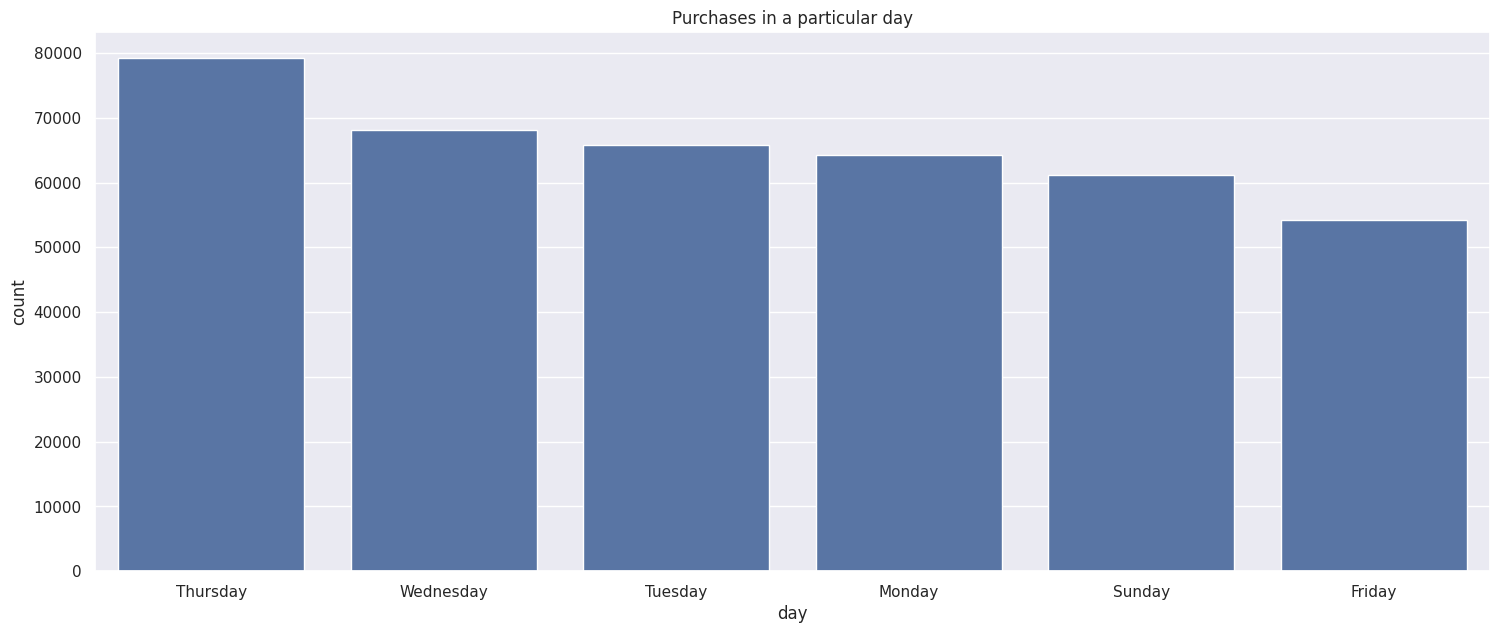

In [42]:
# Chart - 8 visualization code

# Plotting the chart
sns.barplot(x='day', y='count', data=day_df)

# Setting title
plt.title("Purchases in a particular day")

# Show chart
plt.show()



Most of the customers have made a purchase in Thursday followed by Wednesday.

Friday is the day with least number of purchases made.

#### Chart - 9
Which month had the most and the least number of purchases?

In [43]:
# number of purchases w.r.t month
month_df = df['month'].value_counts().reset_index()
month_df

,month,count
0,November,63168
1,October,48793
2,December,42696
3,September,39669
4,May,28073
5,June,26926
6,March,26870
7,August,26790
8,July,26580
9,April,22433


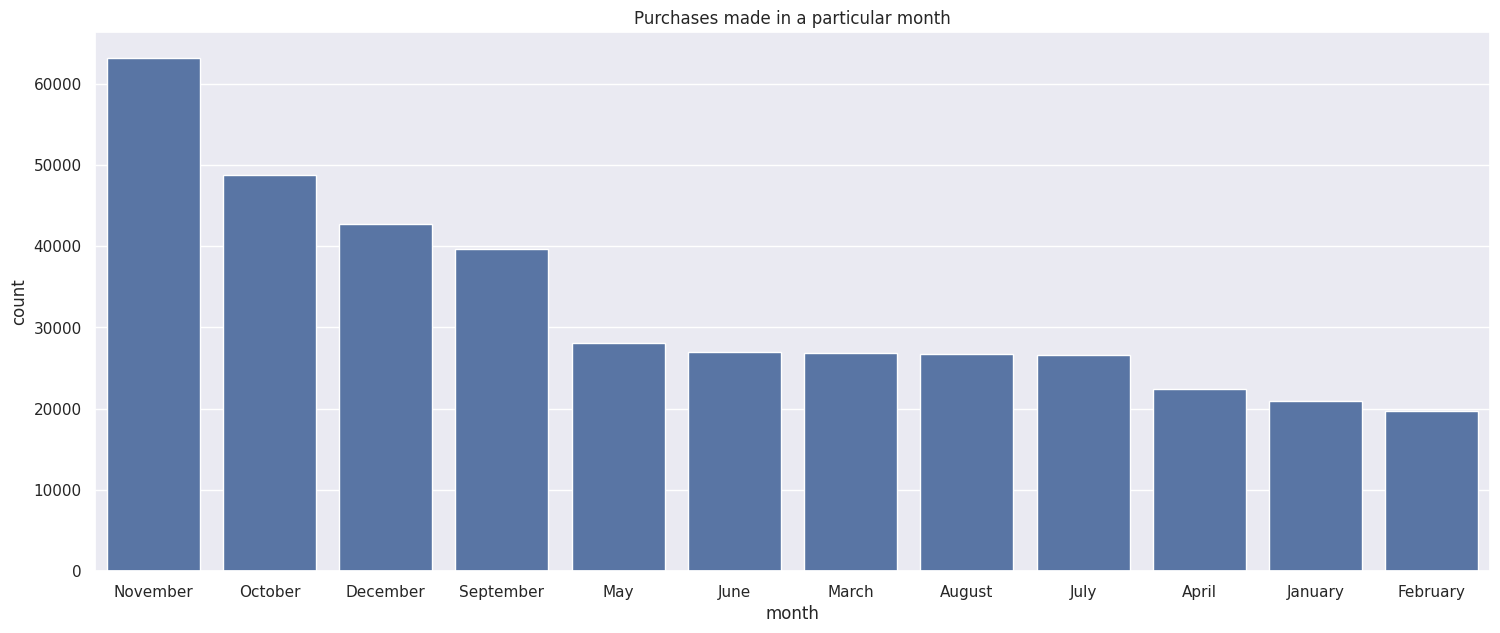

In [44]:
# Chart 9  visualization code

# Plotting the chart
sns.barplot(x='month', y='count', data=month_df)

# Setting title
plt.title("Purchases made in a particular month")

# Show chart
plt.show()





The most number of purchases are made during October to December which is a festive season for many people.

The least number of purchases are made during the initial months of a year, January and February which is quite obvious because as soon as the festive season ends, purchases or sales will go down.

#### Chart - 10
Which hour of the day had the most and the least number of purchases?

In [45]:
# number of purchases w.r.t hour of the day
hour_df = df['hour'].value_counts().reset_index()
hour_df

,hour,count
0,12,70938
1,13,63019
2,14,53251
3,11,48365
4,15,44790
5,10,37773
6,16,23715
7,9,21927
8,17,12941
9,8,8687


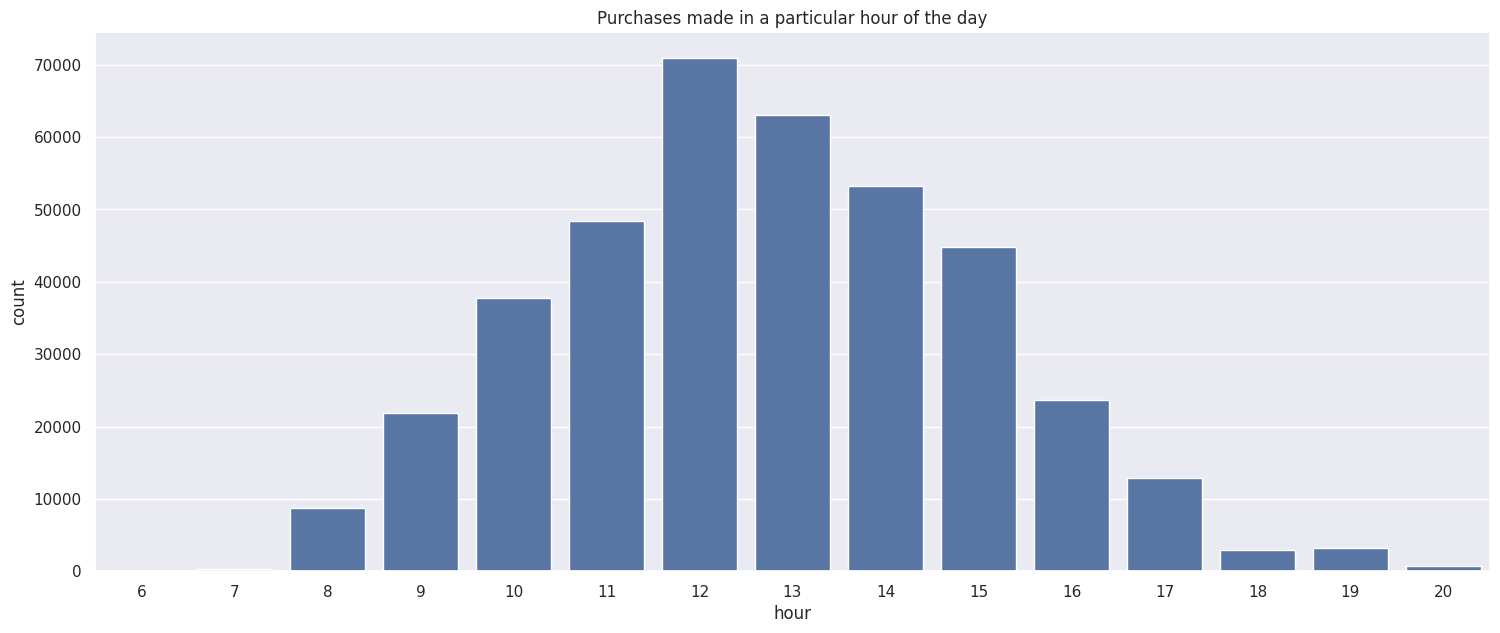

In [46]:
# Chart 10 visualization code

# Plotting the chart
sns.barplot(x='hour', y='count', data=hour_df)

# Setting title
plt.title("Purchases made in a particular hour of the day")

# Show chart
plt.show()

Most of the purchases are around the afternoon period and a very few number of purchases during morning or evening.

We can bucket this hour graph into morning, afternoon and evening buckets.

In [47]:
# group the time into 3 buckets
def time_day(time):
  if (time >= 6 and time <= 11):
    return 'Morning'
  elif (time >= 12 and time <= 17):
    return 'Afternoon'
  else:
    return 'Evening'

# apply the function into the column
df['time_day'] = df['hour'].apply(time_day)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,day,year,month_num,day_num,hour,minute,month,TotalAmount,time_day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,15.30,Morning
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,20.34,Morning
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,22.00,Morning
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,20.34,Morning
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,20.34,Morning


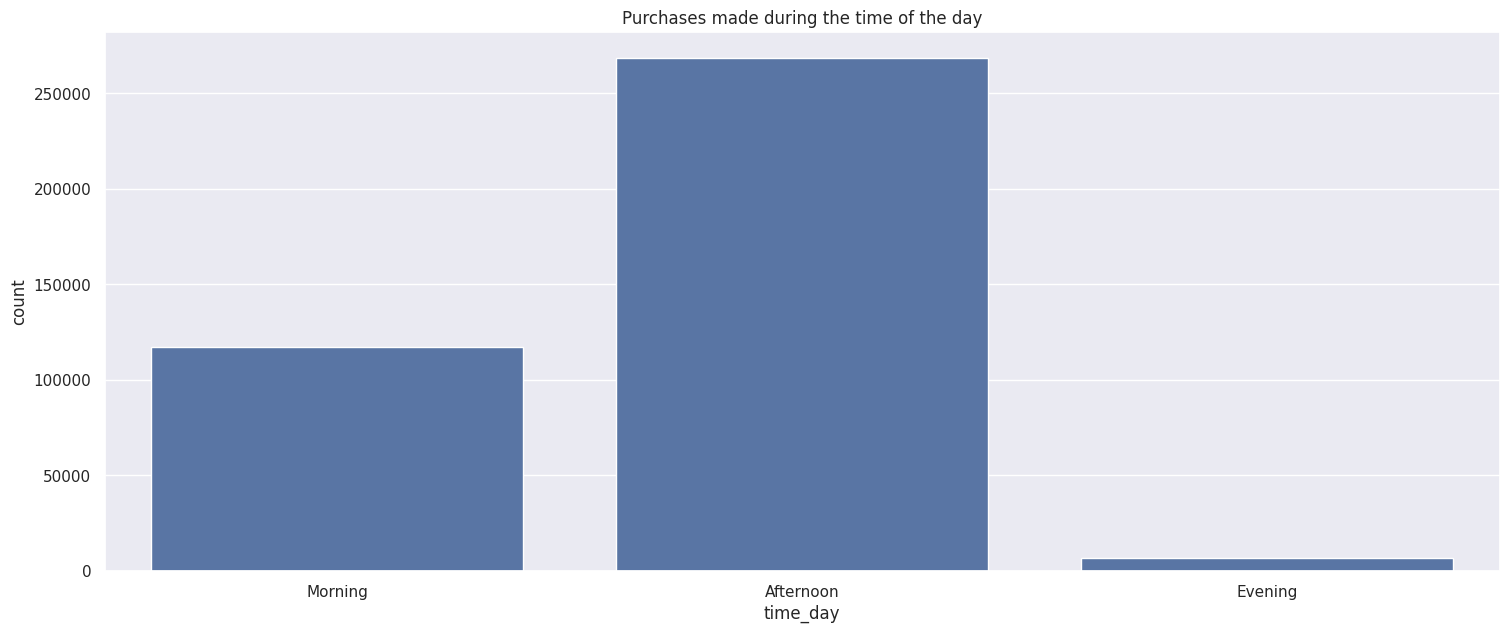

In [48]:
# Plotting the number of purchases w.r.t hour again
sns.countplot(x='time_day', data=df)

# Setting title
plt.title("Purchases made during the time of the day")

# Show chart
plt.show()

Now, it is more clear that most of the purchases has occurred during the Afternoon followed by Morning and the least number of purchases during Evening.

## ***6. RFM Model***

**Let us create the RFM Model (Recency, Frequency and Monetary):**

Recency, frequency, monetary value is a marketing analysis tool used to identify a company's or an organization's best customers by measuring and analyzing spending habits.

The RFM model is based on three quantitative factors:
1. Recency: How recently a customer has made a purchase
2. Frequency: How often a customer makes a purchase
3. Monetary Value: How much money a customer spends on purchases

RFM analysis numerically ranks a customer in each of these three categories, generally on a scale of 1 to 5 (the higher the number, the better the result). The "best" customer would receive a top score in every category.

These three RFM factors can be used to reasonably predict how likely (or unlikely) it is that a customer will do business again with a firm or, in the case of a charitable organization, make another donation.

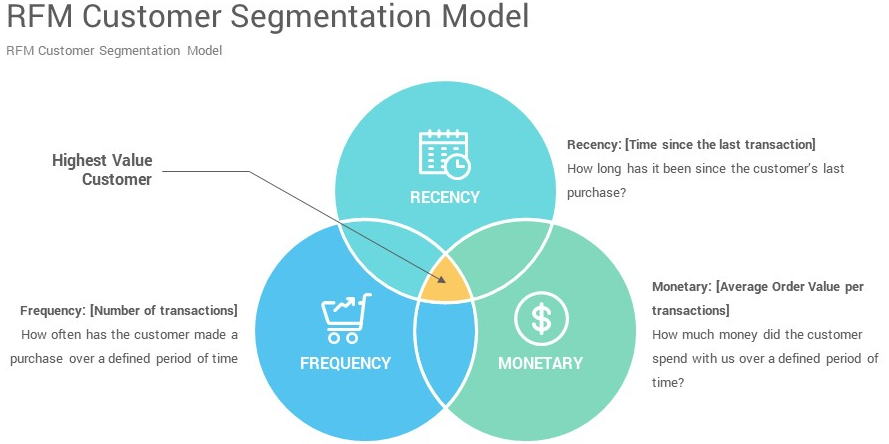

In [49]:
# filter UK data only
df = df[df['Country'] == 'United Kingdom']

# print the shape of the data
df.shape

(349203, 17)

Calculating RFM Scores:

In [50]:
# calculating RFM scores
# set latest date to '2011-12-10' as the last invoice date was '2011-12-09'
latest_date = dt.datetime(2011,12,10)

# create rfm modeling scores for each customer
rfm_df = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (latest_date - x.max()).days, 'InvoiceNo': lambda x: len(x),
                                            'TotalAmount': lambda x: x.sum()})

# convert invoice date into type int
rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype(int)

# rename columns to frequency, recency, monetary
rfm_df.rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'TotalAmount': 'Monetary'}, inplace=True)

rfm_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12747.0,2,103,4196.01
2,12748.0,0,4412,33053.19
3,12749.0,3,199,4090.88
4,12820.0,3,59,942.34


In [51]:
# descriptive stats for the rfm dataframe
rfm_df.describe()

,Recency,Frequency,Monetary
count,3920.000000,3920.000000,3920.000000
mean,91.742092,89.082398,1858.424654
std,99.533485,214.034542,7478.631256
min,0.000000,1.000000,3.750000
25%,17.000000,17.000000,298.185000
50%,50.000000,40.000000,644.975000
75%,142.000000,98.000000,1571.285000
max,373.000000,7676.000000,259657.300000


Let us plot the distribution of Recency, Frequency and Monetary Value:

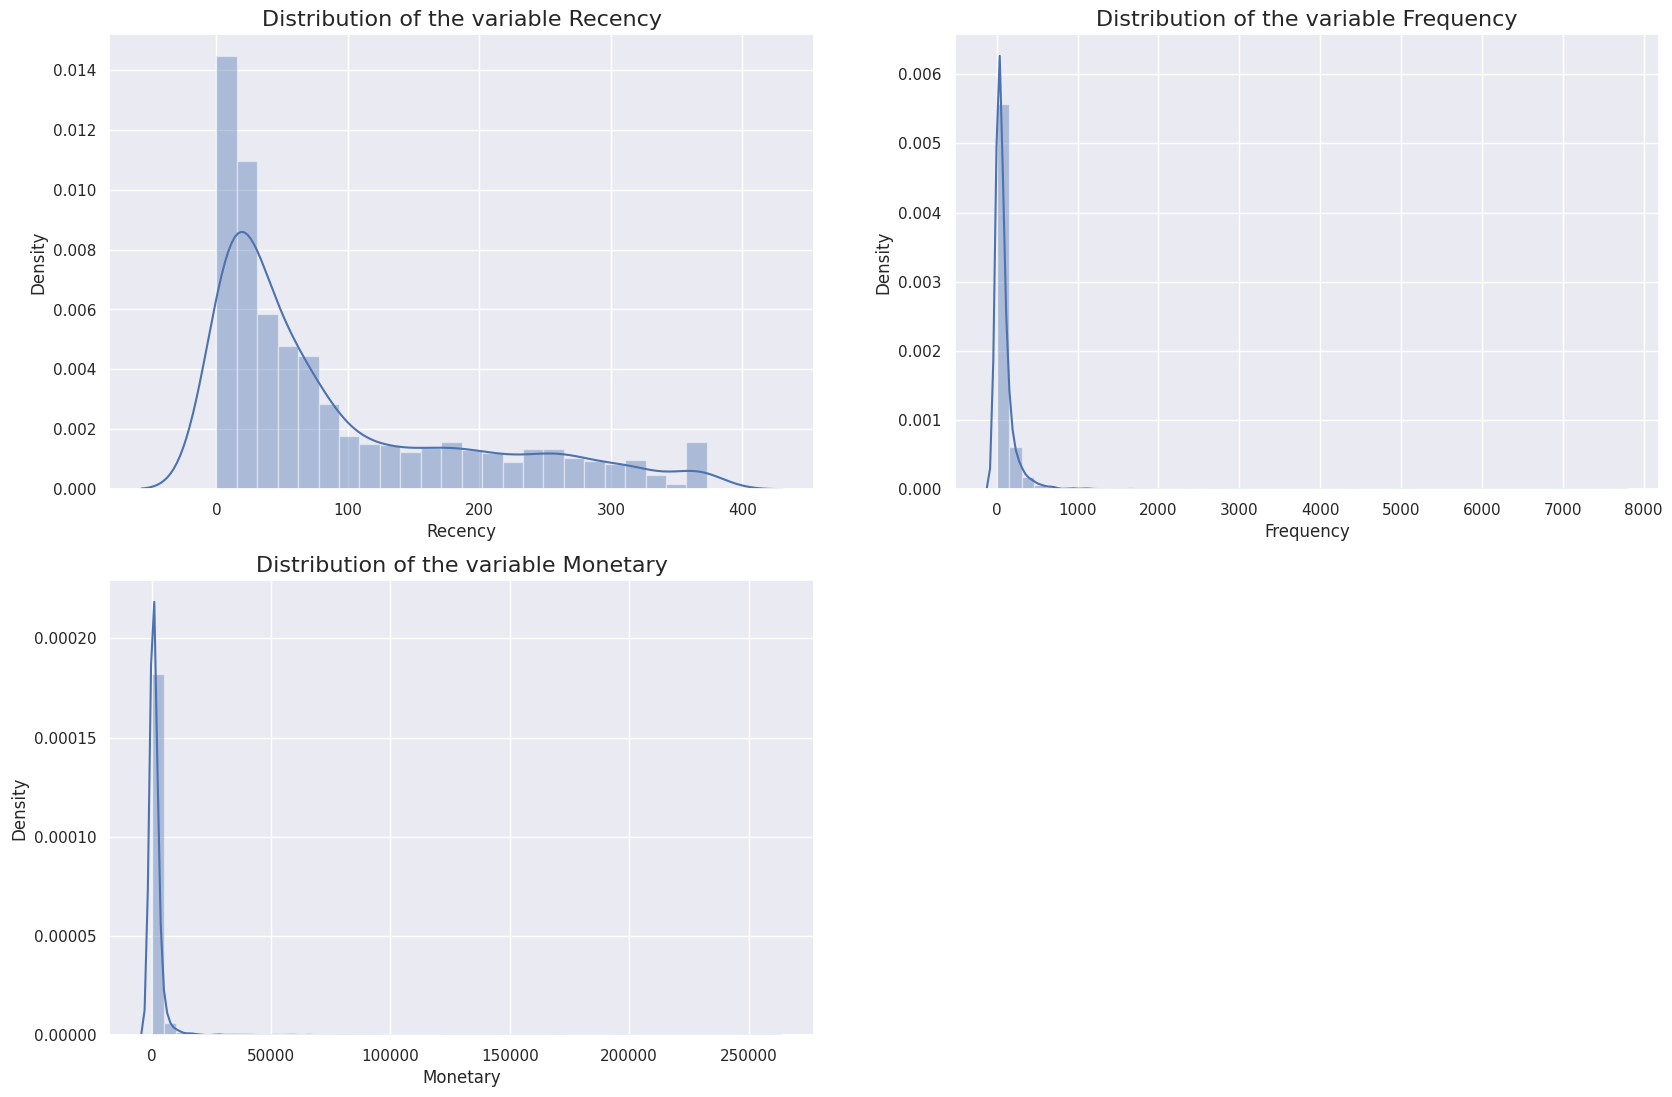

In [52]:
# plot the distribution of the RFM values
count = 1
plt.subplots(figsize=(20,13))
for feature in rfm_df:
  plt.subplot(2,2,count)
  sns.distplot(rfm_df[feature])
  plt.title(f"Distribution of the variable {feature}", fontsize=16)
  plt.xlabel(f"{feature}")
  plt.ylabel("Density")
  count += 1

Apply Log Transformation

In [53]:
# treat the negative and zero values to handle infinite numbers during log transformation
def handle_negative(num):
  if num <= 0:
    return 1
  else:
    return num

# apply the function to recency and monetary columns
rfm_df['Recency'] = [handle_negative(x) for x in rfm_df['Recency']]
rfm_df['Monetary'] = [handle_negative(x) for x in rfm_df['Monetary']]

# apply log transfomation to RFM values
log_df = rfm_df[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis=1).round(3)

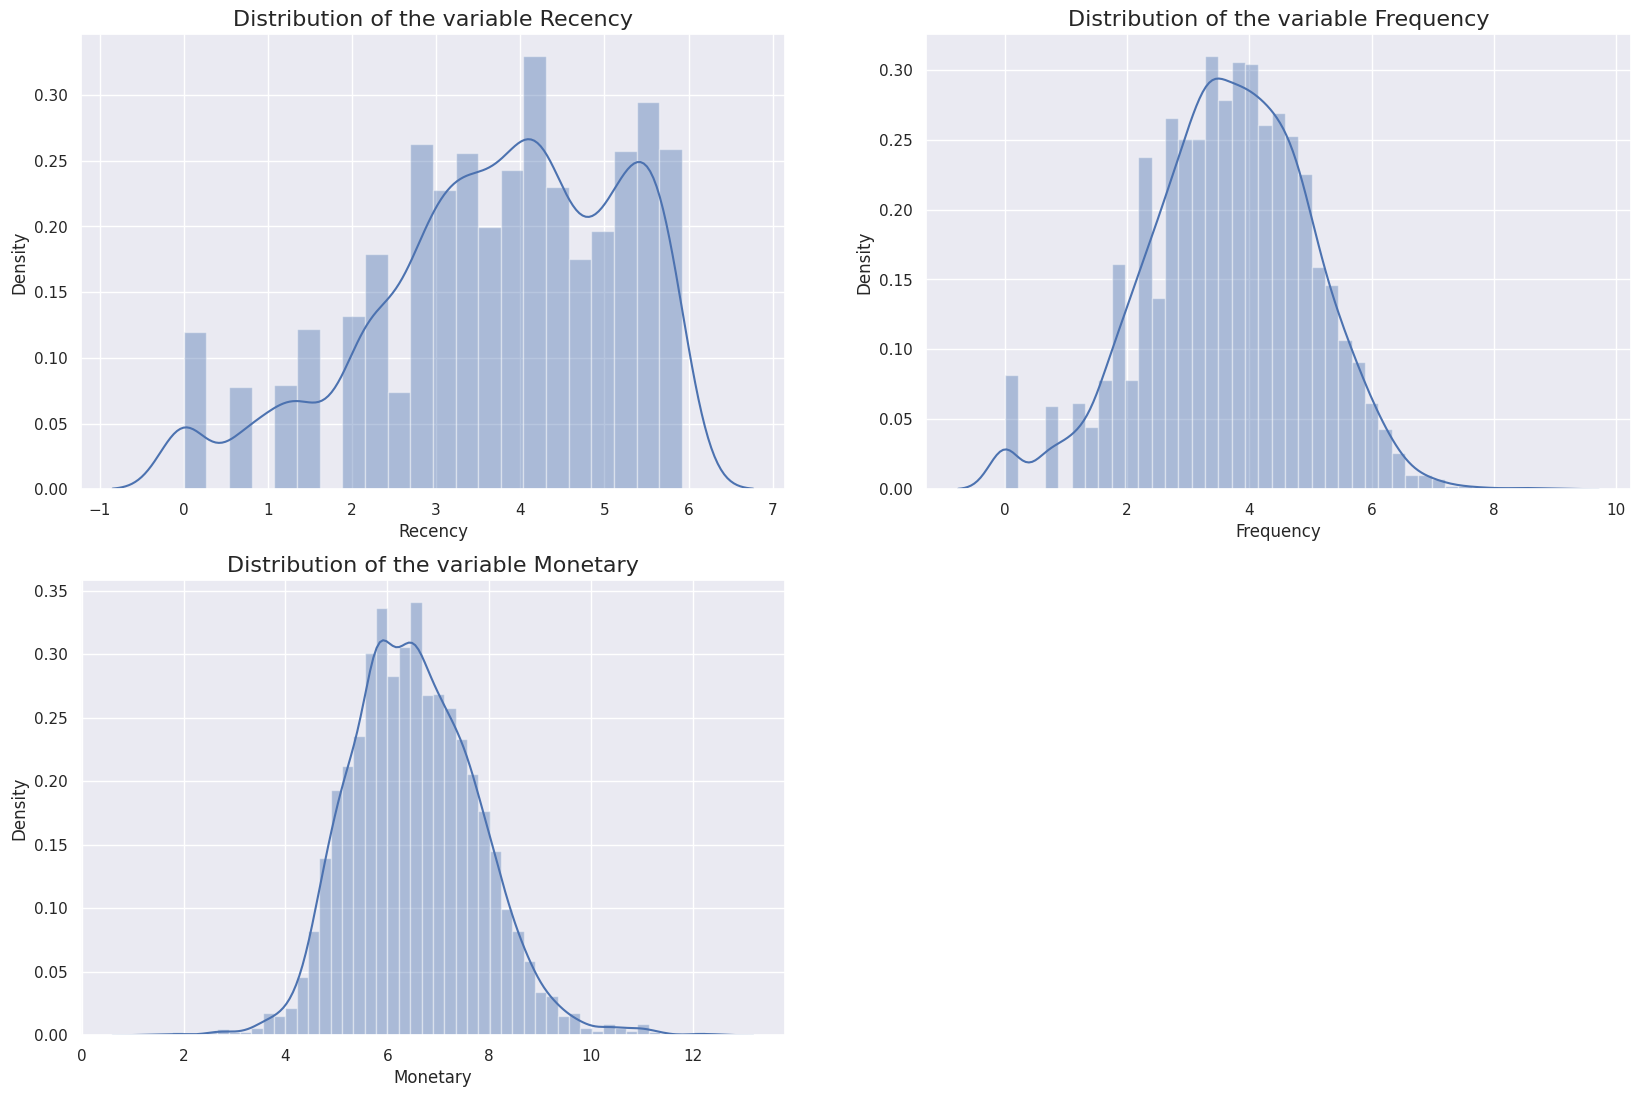

In [54]:
# plot the log transformed distribution
count = 1
plt.subplots(figsize=(20,13))
for feature in log_df:
  plt.subplot(2,2,count)
  sns.distplot(log_df[feature])
  plt.title(f"Distribution of the variable {feature}", fontsize=16)
  plt.xlabel(f"{feature}")
  plt.ylabel("Density")
  count += 1

In [55]:
# apply log transformation on the original rfm dataframe
rfm_df['Recency_log'] = rfm_df['Recency'].apply(math.log)
rfm_df['Frequency_log'] = rfm_df['Frequency'].apply(math.log)
rfm_df['Monetary_log'] = rfm_df['Monetary'].apply(math.log)

In [56]:
# display the rfm_df
rfm_df.head()

,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log
CustomerID,,,,,,
12346.0,325,1,77183.60,5.783825,0.000000,11.253942
12747.0,2,103,4196.01,0.693147,4.634729,8.341889
12748.0,1,4412,33053.19,0.000000,8.392083,10.405873
12749.0,3,199,4090.88,1.098612,5.293305,8.316515
12820.0,3,59,942.34,1.098612,4.077537,6.848366


In [57]:
features = ['Recency_log','Frequency_log','Monetary_log']

#scaling our data
X_features = rfm_df[features].values
scaler = StandardScaler()
X = scaler.fit_transform(X_features)

## ***7. Implementing K-Means Clustering***

Applying Elbow method on Recency, Frequency and Monetary:

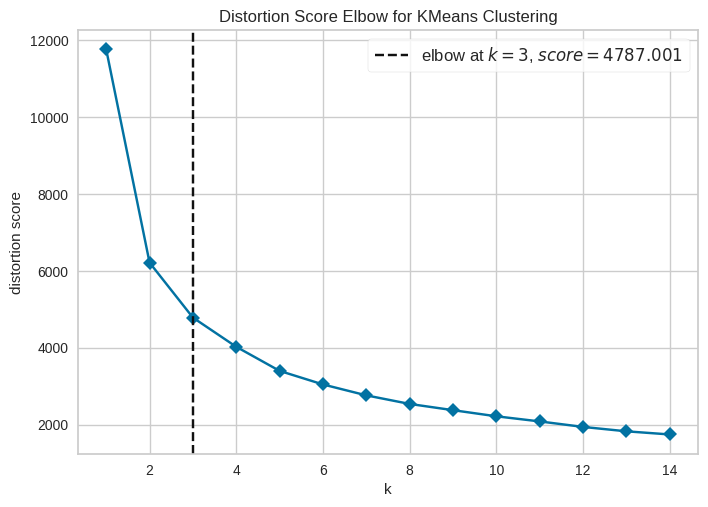

In [59]:
# elbow method to find out the best k
from yellowbrick.cluster import KElbowVisualizer
SSE= {}
for k in range(1,15):
  km = KMeans(n_clusters = k, init = 'k-means++', max_iter = 1000)
  km=km.fit(X)
  SSE[k] = km.inertia_

#plot the graph for SSE and number of clusters
visualizer = KElbowVisualizer(km, k=(1,15), metric='distortion',timings=False)
visualizer.fit(X)
visualizer.poof()
plt.show()

From the elbow method we reach the conclusion that the optimal number of clusters is 3 for Recency, Frequency and Monetary values.

We will again run the model with number of clusters as 3.

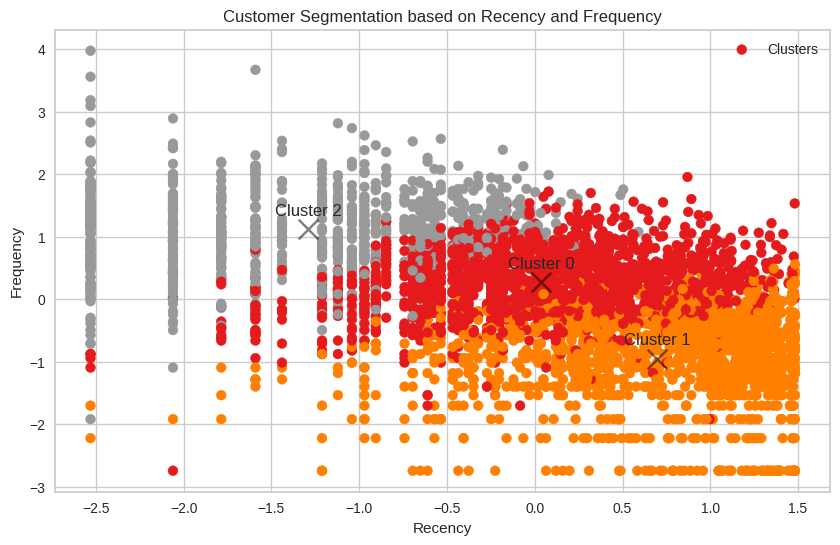

In [60]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming X is your data array
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_km = kmeans.predict(X)

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.title('Customer Segmentation based on Recency and Frequency')
plt.scatter(X[:,0], X[:,1], c=y_km, s=50, cmap='Set1', label='Clusters')

# Plot and annotate the centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=200, alpha=0.5, marker='x')
for i, center in enumerate(centers):
    plt.annotate(f'Cluster {i}', (center[0], center[1]), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend()
plt.show()

We can observe three clusters from the KMeans model applied on Recency, Frequency and Monetary data.

Interpreting the Clusters with the help of RFM Group:

Now, split the RFM values into four quantiles:

In [61]:
# split the rfm values into four quantiles
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [62]:
# function to create R, F, M segments
def RScore(x,p,d):
  if x <= d[p][0.25]:
    return 1
  elif x <= d[p][0.5]:
    return 2
  elif x <= d[p][0.75]:
    return 3
  else:
    return 4

def FnMScore(x,p,d):
  if x <= d[p][0.25]:
    return 4
  elif x <= d[p][0.5]:
    return 3
  elif x <= d[p][0.75]:
    return 2
  else:
    return 1

In [63]:
# calculate RFM segment values for each record
rfm_df['R'] = rfm_df['Recency'].apply(RScore, args=('Recency', quantiles, ))
rfm_df['F'] = rfm_df['Frequency'].apply(FnMScore, args=('Frequency', quantiles, ))
rfm_df['M'] = rfm_df['Monetary'].apply(FnMScore, args=('Monetary', quantiles, ))
rfm_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log,R,F,M
0,12346.0,325,1,77183.60,5.783825,0.000000,11.253942,4,4,1
1,12747.0,2,103,4196.01,0.693147,4.634729,8.341889,1,1,1
2,12748.0,1,4412,33053.19,0.000000,8.392083,10.405873,1,1,1
3,12749.0,3,199,4090.88,1.098612,5.293305,8.316515,1,1,1
4,12820.0,3,59,942.34,1.098612,4.077537,6.848366,1,2,2


# *8. Calculate RFM Group and RFM Score from the RFM segmentation:*

In [64]:
# add RFM group column
rfm_df['RFMGroup'] = rfm_df['R'].map(str) + rfm_df['F'].map(str) + rfm_df['M'].map(str)

# calculate RFM score from RFM group column
rfm_df['RFMScore'] = rfm_df[['R', 'F', 'M']].sum(axis=1)
rfm_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log,R,F,M,RFMGroup,RFMScore
0,12346.0,325,1,77183.60,5.783825,0.000000,11.253942,4,4,1,441,9
1,12747.0,2,103,4196.01,0.693147,4.634729,8.341889,1,1,1,111,3
2,12748.0,1,4412,33053.19,0.000000,8.392083,10.405873,1,1,1,111,3
3,12749.0,3,199,4090.88,1.098612,5.293305,8.316515,1,1,1,111,3
4,12820.0,3,59,942.34,1.098612,4.077537,6.848366,1,2,2,122,5


In [66]:
# find the clusters for the observations in the dataset
rfm_df['Cluster'] = kmeans.labels_
rfm_df.head()

,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log,R,F,M,RFMGroup,RFMScore,Cluster
CustomerID,,,,,,,,,,,,
12346.0,325,1,77183.60,5.783825,0.000000,11.253942,4,4,1,441,9,0
12747.0,2,103,4196.01,0.693147,4.634729,8.341889,1,1,1,111,3,2
12748.0,1,4412,33053.19,0.000000,8.392083,10.405873,1,1,1,111,3,2
12749.0,3,199,4090.88,1.098612,5.293305,8.316515,1,1,1,111,3,2
12820.0,3,59,942.34,1.098612,4.077537,6.848366,1,2,2,122,5,2


In [70]:
# Group by cluster label and calculate mean
cluster_averages = rfm_df.groupby('Cluster').mean()
cluster_averages

,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log,R,F,M,RFMGroup,RFMScore
Cluster,,,,,,,,,,,
0,67.853600,69.166969,1199.700365,3.787118,4.012225,6.770923,2.425287,2.156685,2.198427,inf,6.780399
1,165.282744,15.119196,286.190805,4.759947,2.386550,5.410671,3.298683,3.629245,3.564103,inf,10.492030
2,10.912621,258.559466,5933.187633,1.830261,5.151263,8.043445,1.207524,1.288835,1.241505,inf,3.737864


# *9. Interpretation*



1. Cluster 0:


*   Recency: Moderate (average around 68 days)
*   Frequency: Moderate (average around 69 transactions)
*   Monetary: Moderate (average around $1200)



Interpretation: Customers in this cluster can be seen as 'Potential Loyalists' or 'Promising' customers. They have a balanced score in all three RFM metrics. These customers have the potential to become more valuable if properly engaged. Tailored marketing strategies, loyalty programs, and incentives to increase their purchase frequency and value can be effective.



2. Cluster 1:


*   Recency: High (average around 165 days)
*   Frequency: Low (average around 15 transactions)
*   Monetary: Low (average around $286)


Interpretation: Customers in this cluster are likely to be 'At-Risk' or 'Lapsed' customers. They haven't made purchases recently, and when they did, they didn't do so very frequently and didn't spend much. These customers might have been one-time buyers or occasional shoppers. Engaging them with reactivation campaigns or exploring why they haven’t returned can be a strategic move.

.

3. Cluster 2:

*   Recency: Very Low (average around 11 days)
*   Frequency: Very High (average around 259 transactions)
*   Monetary: Very High (average around $5933)

Interpretation: This cluster represents your 'Champions' or 'Loyal' customers. They shop frequently, recently, and spend the most. They are the most valuable segment, likely to respond positively to new offers, up-sell and cross-sell opportunities. Maintaining their high engagement level is crucial, and they can also be targeted for feedback or as brand ambassadors








Overall Strategy:

Cluster 0 ('Potential Loyalists/Promising'): Encourage them to visit and buy more often. Personalized communication, recommending products based on past purchases, and loyalty rewards can be effective.


Cluster 1 ('At-Risk/Lapsed'): Focus on re-engagement strategies. Understand their needs and reasons for not returning. Offer incentives or feedback surveys to encourage them to revisit and make purchases.


Cluster 2 ('Champions/Loyal'): Prioritize maintaining their high level of engagement. Offer exclusive deals, loyalty programs, and early access to new products. They can also be engaged in referral programs.

# *10. Conclusion*

Thus, from our comparison table we can conclude that KMeans clustering on Recency, Frequency and Monetary data gives us the best result with the optimal number of clusters as 3. We can use this model to cluster our data in 3 segments and develop better marketing strategies.